# 1  Introduction

Team: 
<par> David Grogan (SCPD Student) 
<par> Peter Gjeltema (SCPD Student)

# 2 Choosing a dataset 

<par> Project Topic: MLB Baseball - Pitching Data
<par> Dataset: Lahman's Baseball Database (https://cran.r-project.org/web/packages/Lahman/Lahman.pdf)

# 3 Register a Team

[X] COMPLETE

# 4 Setting Aside a Holdout

In [55]:
# load packages
library(Lahman)
library(tidyverse)
library(GGally)

In [56]:
?Lahman

In [57]:
# # create data set combining playoff and reg season pitching stats
# cat("Pitching table dim: ", dim(PitchingPost), "\n")
# aug_pitch = inner_join(PitchingPost, Pitching, by=c("playerID", "yearID")) %>% na.omit()
# cat("Pitcher w/ Postseason clean dim: ", dim(aug_pitch), "\n")

# ##PROBLEM - DOES CLEANED DATASET GIVE ENOUGH VALUES?

# Pitcher_clean = Pitching %>% na.omit()
# #Pitcher_clean = Pitching[complete.cases(Pitching), ]
# cat("Pitcher_clean dim: ", dim(Pitcher_clean))

# ## THIS SEEMS MORE REASONABLE - LARGER N, SMALLER P

In [58]:
dim(Batting)
# TODO later: how are players who were traded midseason represented here?
# TODO: Join with Master to get Ht, Wt, Handedness, Age
# TODO: Look for the column that has incomplete data the latest and see if we
#       can cut it to preserve more rows. Possibly Sac Hits
aug_bat = inner_join(Batting, BattingPost, by=c("playerID", "yearID")) %>% na.omit()
dim(aug_bat)
#head(aug_bat)
#colnames(aug_bat)

aug_bat$P_SLG = (1*(aug_bat$H.y - aug_bat$X2B.y - aug_bat$X3B.y - aug_bat$HR.y)  + 2*aug_bat$X2B.y + 3*aug_bat$X3B.y + 4*aug_bat$HR.y)/aug_bat$AB.y
aug_bat$P_OBP = (aug_bat$H.y + aug_bat$BB.y + aug_bat$HBP.y)/ (aug_bat$AB.y + aug_bat$BB.y + aug_bat$HBP.y + aug_bat$SF.y)
aug_bat$P_OPS = aug_bat$P_SLG + aug_bat$P_OBP
aug_bat$P_BA  = aug_bat$H.y / aug_bat$AB.y
paste("rows before na.omit: ", nrow(aug_bat))
# We lose 4200 rows here even though we did na.omit after the join. Maybe 4200 players have 0 postseason AB?
aug_bat = aug_bat %>% na.omit()
paste("rows after na.omit: ", nrow(aug_bat))
head(aug_bat)
#fin_bat =  aug_bat[, c(1:22)], aug_bat[, c(42:44)]) #cbind(aug_bat[, c(1:22)], aug_bat[, c(42:44)])
fin_bat = aug_bat[ , -c(23:42)]
dim(fin_bat)

[1] 102816     22

[1] 12594    42

[1] "rows before na.omit:  12594"

[1] "rows after na.omit:  8391"

,playerID,yearID,stint,teamID.x,lgID.x,G.x,AB.x,R.x,H.x,X2B.x,⋯,SO.y,IBB.y,HBP.y,SH.y,SF.y,GIDP.y,P_SLG,P_OBP,P_OPS,P_BA
2199,amorosa01,1955,1,BRO,NL,119,388,59,96,16,⋯,4,1,1,0,0,0,0.5833333,0.5294118,1.1127451,0.3333333
2200,bauerha01,1955,1,NYA,AL,139,492,97,137,20,⋯,1,0,0,0,0,0,0.4285714,0.4285714,0.8571429,0.4285714
2201,berrayo01,1955,1,NYA,AL,147,541,84,147,20,⋯,1,0,1,0,0,0,0.5833333,0.5000000,1.0833333,0.4166667
2202,bessedo01,1955,1,BRO,NL,24,20,1,2,0,⋯,1,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0.0000000
2203,byrneto01,1955,1,NYA,AL,45,78,6,16,1,⋯,2,0,0,0,0,1,0.1666667,0.1666667,0.3333333,0.1666667
2204,camparo01,1955,1,BRO,NL,123,446,81,142,20,⋯,3,0,0,1,0,0,0.5925926,0.3333333,0.9259259,0.2592593


[1] 8391   26

In [59]:
write.csv(fin_bat, file = "fin_bat.csv",row.names=FALSE)

In [106]:
# 80-20 split
set.seed(1)
set_size = dim(fin_bat)[1]
train = sample(seq(set_size), 0.8*set_size)
train_set = fin_bat[train, ]
test_set = fin_bat[-train, ]

# train_set <- train_set[-which(train_set$playerID == "bondsba01"),]
train_set[which(train_set$playerID == "bondsba01"),]

,playerID,yearID,stint,teamID.x,lgID.x,G.x,AB.x,R.x,H.x,X2B.x,⋯,SO.x,IBB.x,HBP.x,SH.x,SF.x,GIDP.x,P_SLG,P_OBP,P_OPS,P_BA
9428,bondsba01,2003,1,SFN,NL,130,390,111,133,22,⋯,58,61,10,0,2,7,0.3333333,0.5555556,0.8888889,0.2222222
5947,bondsba01,1990,1,PIT,NL,151,519,104,156,32,⋯,83,15,3,0,6,8,0.1666667,0.3750000,0.5416667,0.1666667
8352,bondsba01,2000,1,SFN,NL,143,480,129,147,28,⋯,77,22,3,0,7,6,0.3529412,0.3000000,0.6529412,0.1764706
9077,bondsba01,2002,1,SFN,NL,143,403,117,149,31,⋯,47,68,9,0,2,4,0.8235294,0.4090909,1.2326203,0.2941176
9078,bondsba01,2002,1,SFN,NL,143,403,117,149,31,⋯,47,68,9,0,2,4,1.2941176,0.7000000,1.9941176,0.4705882
6088,bondsba01,1991,1,PIT,NL,153,510,95,149,28,⋯,73,25,4,0,13,8,0.1851852,0.2068966,0.3920817,0.1481481
6241,bondsba01,1992,1,PIT,NL,140,473,109,147,36,⋯,69,32,5,0,7,9,0.4347826,0.4333333,0.8681159,0.2608696
7314,bondsba01,1997,1,SFN,NL,159,532,123,155,26,⋯,87,34,8,0,5,13,0.4166667,0.2307692,0.6474359,0.2500000
9076,bondsba01,2002,1,SFN,NL,143,403,117,149,31,⋯,47,68,9,0,2,4,0.7272727,0.5909091,1.3181818,0.2727273


# 5 Investigating and Exploring the Data

In [93]:
# basic stats on dataset
head(train_set)
summary(train_set)
sapply(train_set, sd, na.rm=TRUE)

,playerID,yearID,stint,teamID.x,lgID.x,G.x,AB.x,R.x,H.x,X2B.x,⋯,SO.x,IBB.x,HBP.x,SH.x,SF.x,GIDP.x,P_SLG,P_OBP,P_OPS,P_BA
5208,blackbu02,1985,1,KCA,AL,33,0,0,0,0,⋯,0,0,0,0,0,0,0.0000000,0.0000000,0.0000000,0.0000000
6478,mulhote01,1993,1,PHI,NL,29,62,3,4,0,⋯,27,0,0,8,0,0,0.0000000,0.0000000,0.0000000,0.0000000
9032,willima04,2001,1,ARI,NL,106,408,58,112,30,⋯,70,3,3,0,3,15,0.1250000,0.2500000,0.3750000,0.0625000
13561,fistedo01,2014,1,WAS,NL,26,52,3,4,1,⋯,21,0,0,9,0,0,0.0000000,0.0000000,0.0000000,0.0000000
4431,soderer01,1980,1,NYA,AL,95,275,38,79,13,⋯,25,2,1,1,0,9,0.1666667,0.1666667,0.3333333,0.1666667
13437,youngde03,2013,1,PHI,NL,80,272,22,71,13,⋯,69,0,3,0,2,7,1.3333333,0.5000000,1.8333333,0.3333333


   playerID             yearID         stint         teamID.x    lgID.x   
 Length:6712        Min.   :1955   Min.   :1.00   NYA    : 625   AA:   0  
 Class :character   1st Qu.:1983   1st Qu.:1.00   SLN    : 490   AL:3063  
 Mode  :character   Median :1999   Median :1.00   ATL    : 410   FL:   0  
                    Mean   :1995   Mean   :1.08   LAN    : 401   NA:   0  
                    3rd Qu.:2008   3rd Qu.:1.00   OAK    : 337   NL:3649  
                    Max.   :2016   Max.   :3.00   SFN    : 308   PL:   0  
                                                  (Other):4141   UA:   0  
      G.x             AB.x            R.x              H.x        
 Min.   :  1.0   Min.   :  0.0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 48.0   1st Qu.:104.0   1st Qu.: 12.00   1st Qu.: 26.00  
 Median :102.0   Median :299.0   Median : 38.00   Median : 78.00  
 Mean   : 94.9   Mean   :303.8   Mean   : 43.62   Mean   : 82.66  
 3rd Qu.:140.0   3rd Qu.:492.0   3rd Qu.: 71.00   3rd Qu.:136.00 

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.”Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.”

playerID      yearID       stint    teamID.x      lgID.x         G.x 
         NA  15.6820937   0.2790439  40.6754506   1.4943836  47.5223720 
       AB.x         R.x         H.x       X2B.x       X3B.x        HR.x 
201.8076040  34.2776782  59.9671013  12.2386635   2.3921938  10.5460775 
      RBI.x        SB.x        CS.x        BB.x        SO.x       IBB.x 
 34.2627248  10.0929814   3.3666807  27.4420044  37.8436846   4.3581057 
      HBP.x        SH.x        SF.x      GIDP.x       P_SLG       P_OBP 
  3.6047212   3.4614690   2.7067502   5.8745079   0.3609732   0.2128877 
      P_OPS        P_BA 
  0.5421043   0.2022861

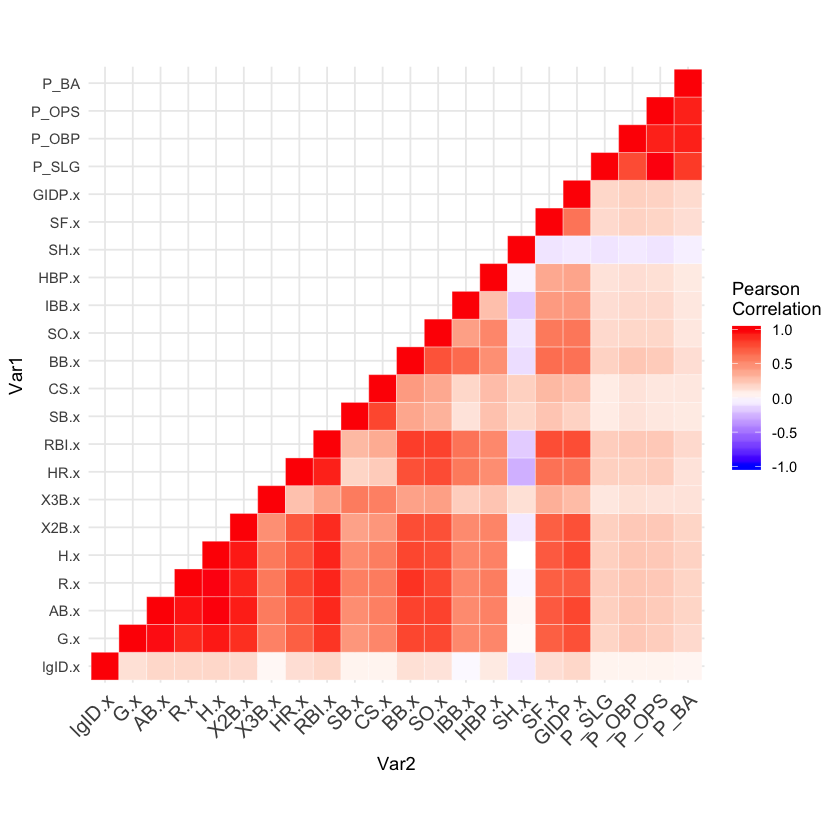

In [94]:
#train_set$playerID = as.factor(train_set$playerID)
#train_set$yearID = as.factor(train_set$yearID)
#train_set$stint = as.factor(train_set$stint)
#train_set$teamID = as.factor(train_set$teamID)
#train_set$lgID = as.factor(train_set$lgID)
#head(train_set)
#cor(train_set)

## CORRELATIONS
library(reshape2)
train_set$lgID.x = ifelse(train_set$lgID.x=="AL", 1, 0)
#head(train_set)
cormat = round(cor(train_set[, -c(1, 2, 3, 4)]), 2)
melted_cormat = melt(cormat)
# ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
#   geom_tile()

# Get lower triangle of the correlation matrix
  get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }

upper_tri <- get_upper_tri(cormat)
#upper_tri

# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Heatmap
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

### Hilarious that sac bunts negatively correlated with power numbers $\uparrow\uparrow$, but I don't know how revelatory they will be in our analysis.

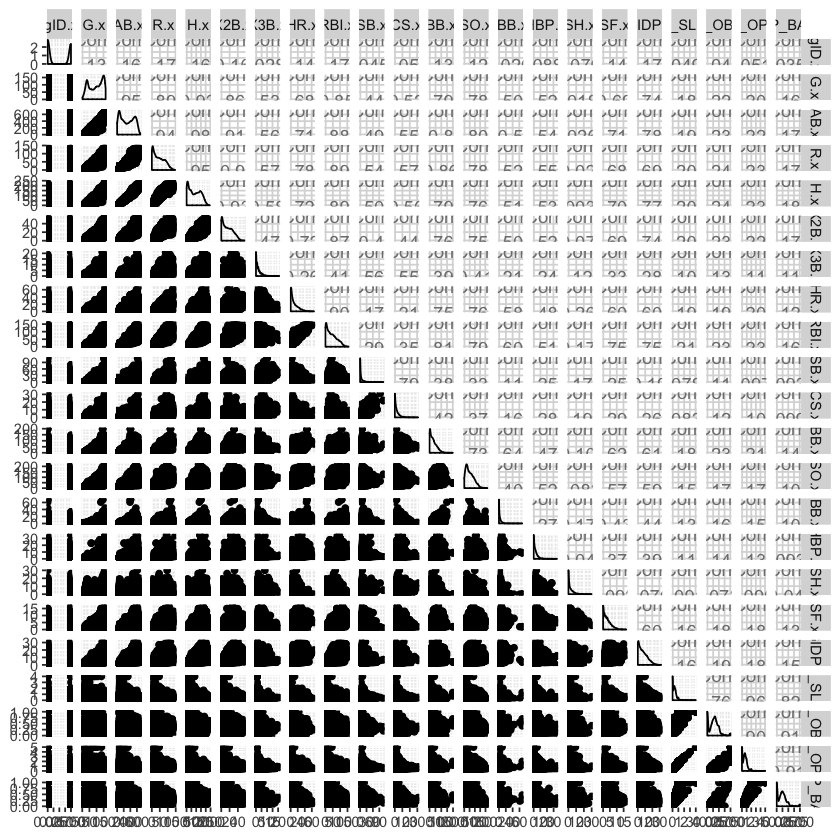

In [95]:
ggpairs(train_set[-c(1,2,3,4)])
# IBB has some funky looking scatterplots where some of the mass is disconnected, not just concave

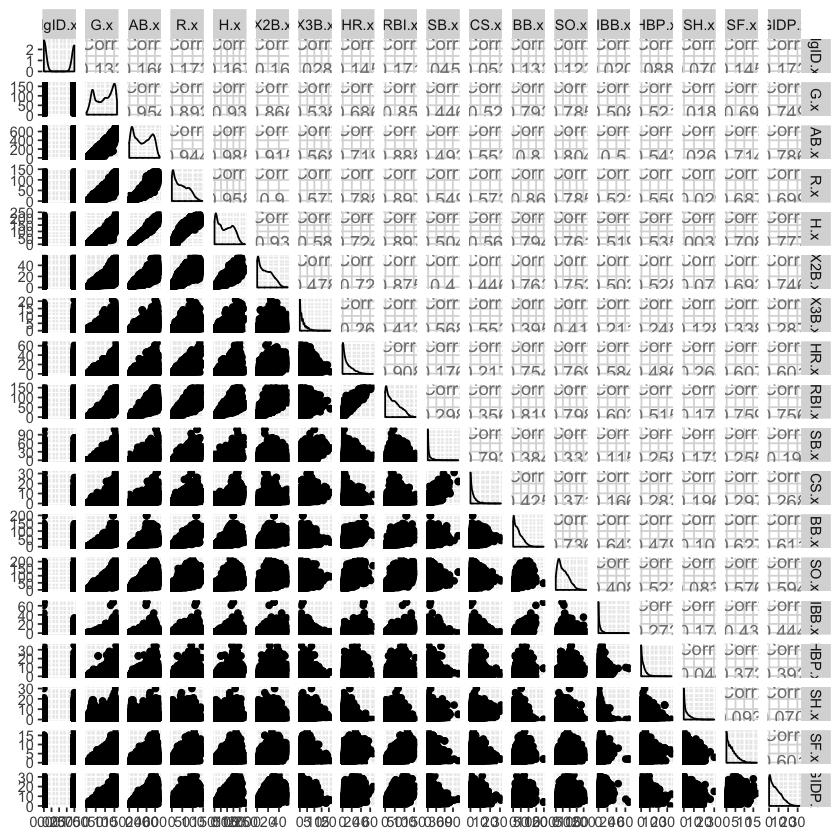

In [96]:
# Same as above, but covariates only, no outcomes:
ggpairs(train_set[-c(1,2,3,4,23:26)])

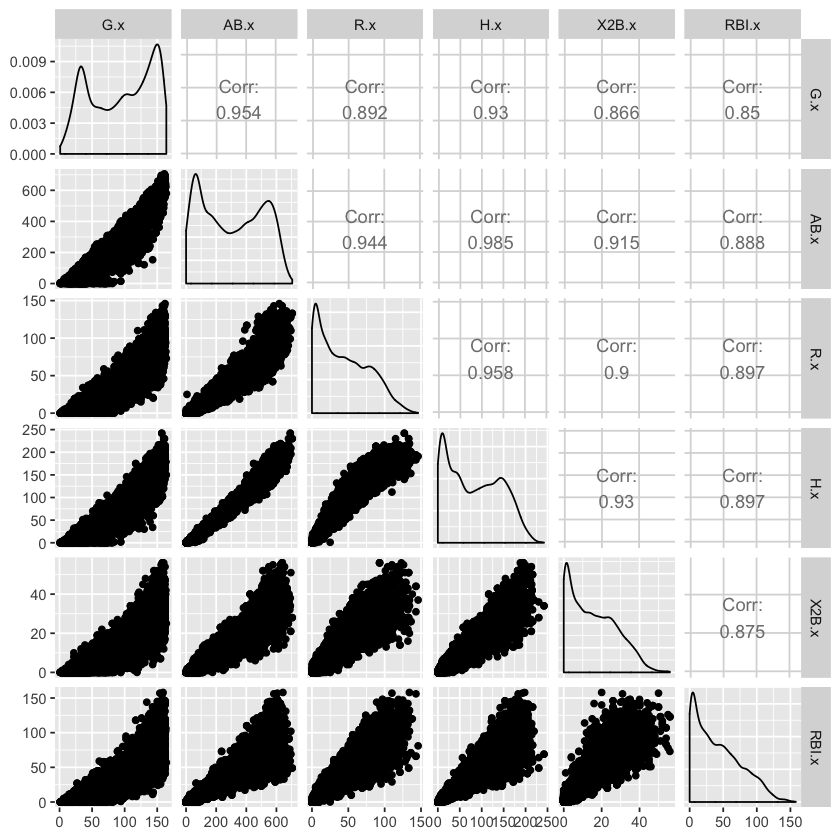

In [97]:
# These counting stats will add up at a somewhat constant rate -- the high correlation here could be trouble for us
ggpairs(train_set[, c(6:10, 13)])

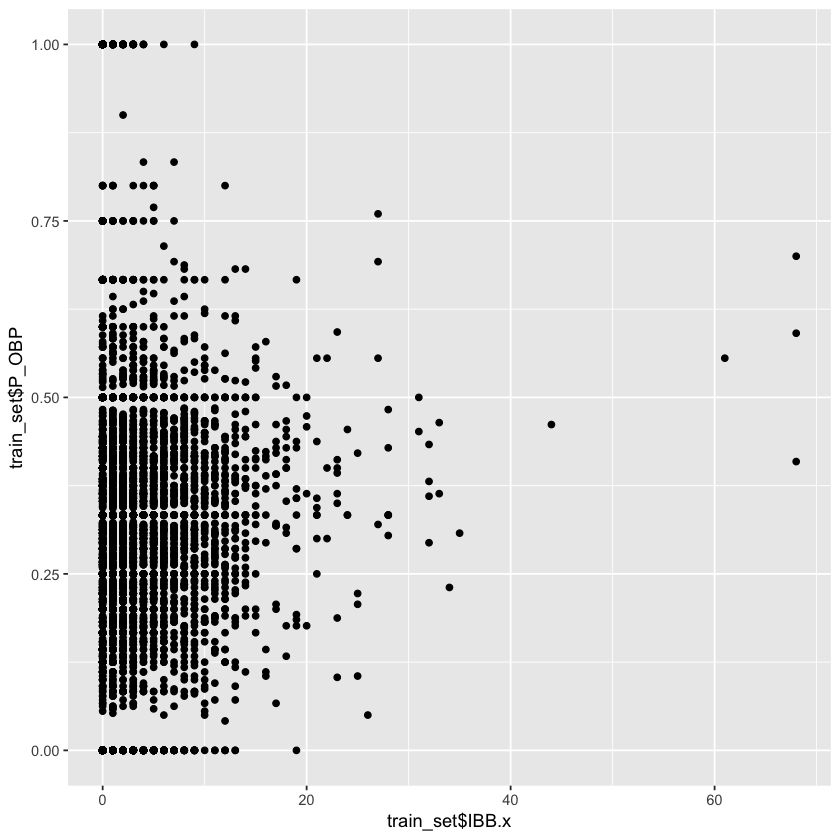

In [98]:
# Hm, this doesn't look as funky as it did in ggpairs
qplot(train_set$IBB.x, train_set$P_OBP)

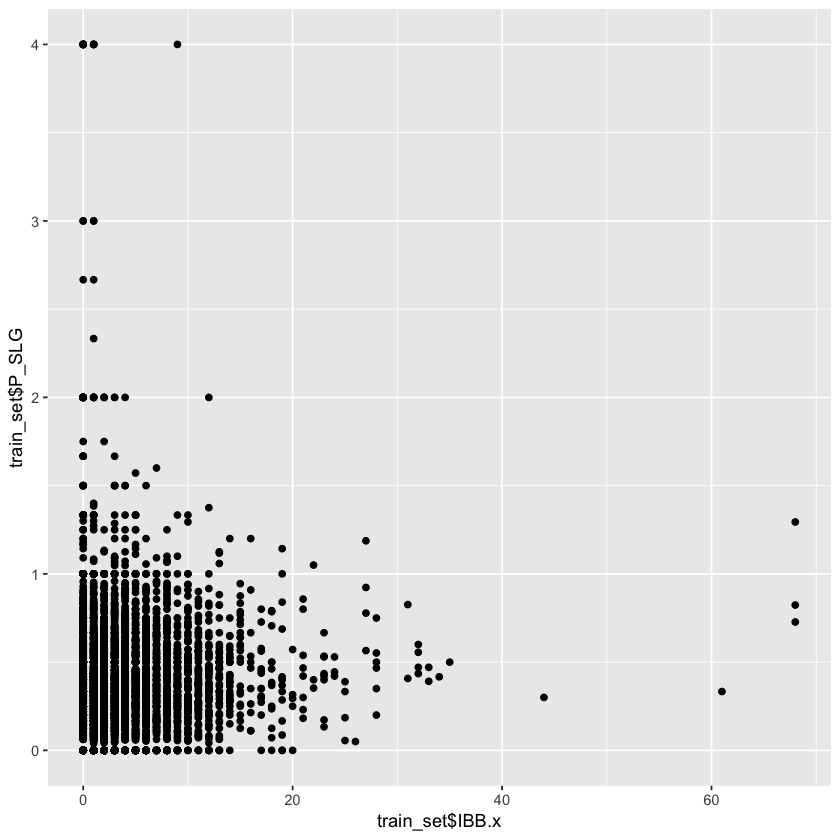

In [99]:
# Just trying to recreate IBB funkiness
qplot(train_set$IBB.x, train_set$P_SLG)

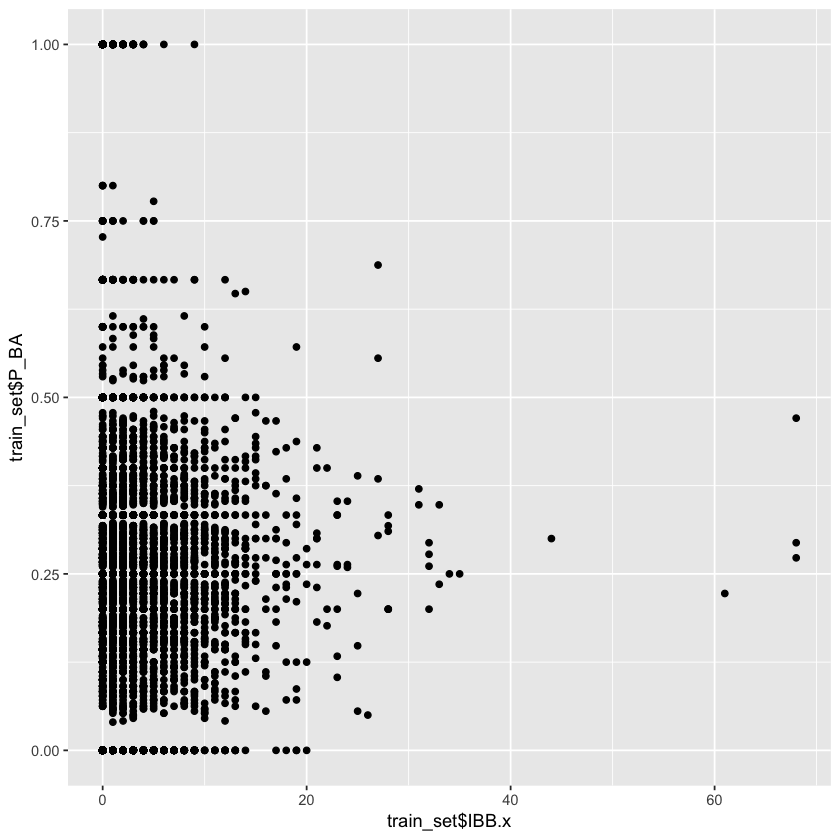

In [100]:
# Just trying to recreate IBB funkiness, still failing
qplot(train_set$IBB.x, train_set$P_BA)

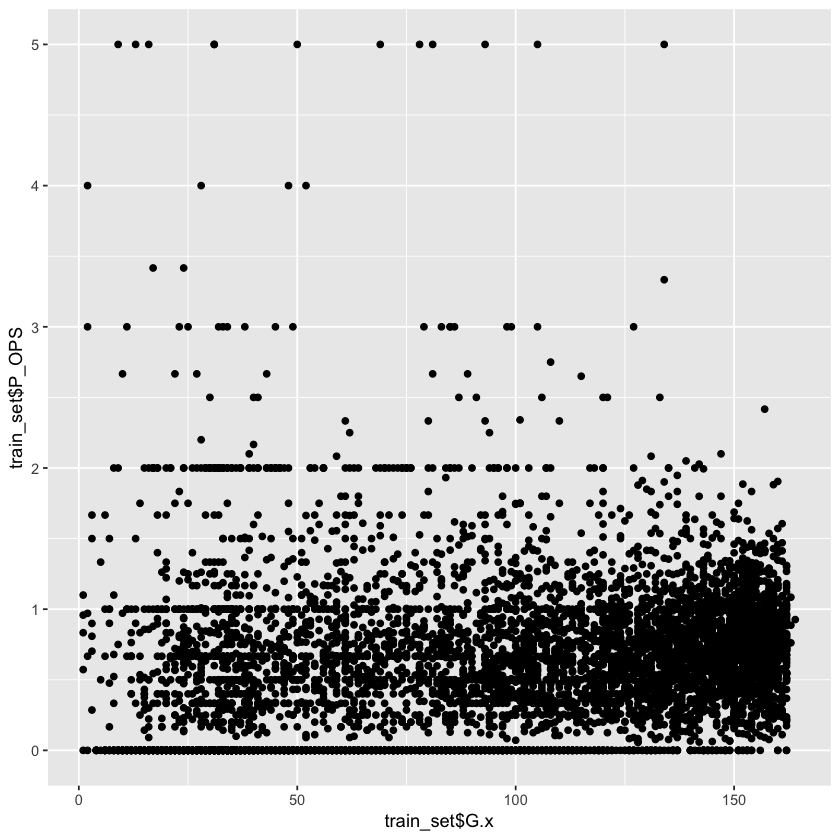

In [101]:
# We should either OPS=ln(OPS) or remove rows under certain number of plate appearances
qplot(train_set$G.x, train_set$P_OPS)

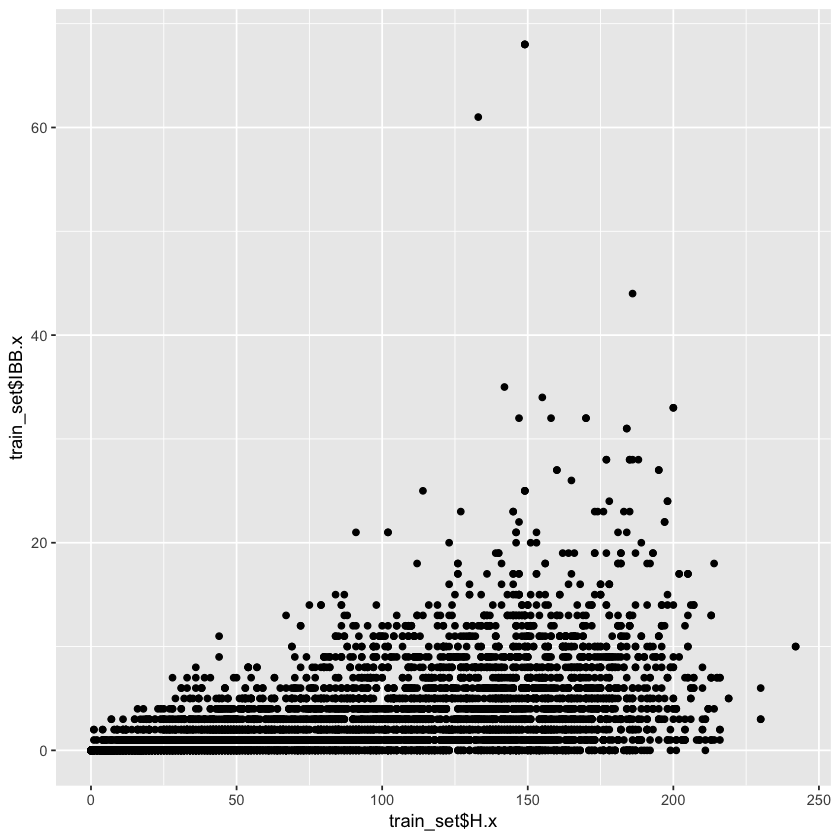

In [102]:
# Back to IBB, this time against another covariate, not a response variable.
qplot(train_set$H.x, train_set$IBB.x)
# So now it looks like the apparent IBB funkiness in ggpairs is just Bonds from like 99-04.
# Maybe we should omit him because his numbers are so abnormal